In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/20-skin-diseases-dataset/Dataset/test/Light Diseases and Disorders of Pigmentation/melasma-34.jpg
/kaggle/input/20-skin-diseases-dataset/Dataset/test/Light Diseases and Disorders of Pigmentation/milia-3.jpg
/kaggle/input/20-skin-diseases-dataset/Dataset/test/Light Diseases and Disorders of Pigmentation/sun-damaged-skin-46.jpg
/kaggle/input/20-skin-diseases-dataset/Dataset/test/Light Diseases and Disorders of Pigmentation/phototoxic-reactions-doxycycline-3.jpg
/kaggle/input/20-skin-diseases-dataset/Dataset/test/Light Diseases and Disorders of Pigmentation/sun-damaged-skin-127.jpg
/kaggle/input/20-skin-diseases-dataset/Dataset/test/Light Diseases and Disorders of Pigmentation/melasma-8.jpg
/kaggle/input/20-skin-diseases-dataset/Dataset/test/Light Diseases and Disorders of Pigmentation/porphyrias-8.jpg
/kaggle/input/20-skin-diseases-dataset/Dataset/test/Light Diseases and Disorders of Pigmentation/melasma-32.jpg
/kaggle/input/20-skin-diseases-dataset/Dataset/test/Light Disea

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
!nvidia-smi  # Check NVIDIA GPU status

Sat Apr 19 04:45:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/20-skin-diseases-dataset/Dataset/train',  # Path to training data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/',  # Path to testing data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 2609 images belonging to 19 classes.
Found 3506 images belonging to 1 classes.


In [5]:
path = '../input/20-skin-diseases-dataset/Dataset/train/' #Don't forget that last bar

In [6]:
class_names = sorted(os.listdir(path))
num_classes = len(class_names)

img_size = (192, 192, 3)

print('classes: ', class_names)

classes:  ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


In [7]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

import cv2

labels = []
images = []

print('images:\n')
for cl in class_names:
    print(cl, end=' -> ')
    for img in os.listdir(path + cl):
        label = np.zeros(num_classes)
        label[class_names.index(cl)] = 1
        labels.append(label)
        
        image = np.asarray(cv2.resize(cv2.imread(path + cl + '/' + img, cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1])#That line remove Blue
        
        #image = np.asarray(cv2.resize(cv2.imread(data_path + cl + '/' + img, cv2.COLOR_BGR2RGB), img_size[0:2]))
        images.append(image)
    print('done')

    
labels = np.asarray(labels)
images = np.asarray(images)

print(f'\n\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')

images:

Acne and Rosacea Photos -> done
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions -> done
Atopic Dermatitis Photos -> done
Cellulitis Impetigo and other Bacterial Infections -> done
Eczema Photos -> done
Exanthems and Drug Eruptions -> done
Herpes HPV and other STDs Photos -> done
Light Diseases and Disorders of Pigmentation -> done
Lupus and other Connective Tissue diseases -> done
Melanoma Skin Cancer Nevi and Moles -> done
Poison Ivy Photos and other Contact Dermatitis -> done
Psoriasis pictures Lichen Planus and related diseases -> done
Seborrheic Keratoses and other Benign Tumors -> done
Systemic Disease -> done
Tinea Ringworm Candidiasis and other Fungal Infections -> done
Urticaria Hives -> done
Vascular Tumors -> done
Vasculitis Photos -> done
Warts Molluscum and other Viral Infections -> done


labels shape: (2609, 19)
images shape: (2609, 192, 192, 3)


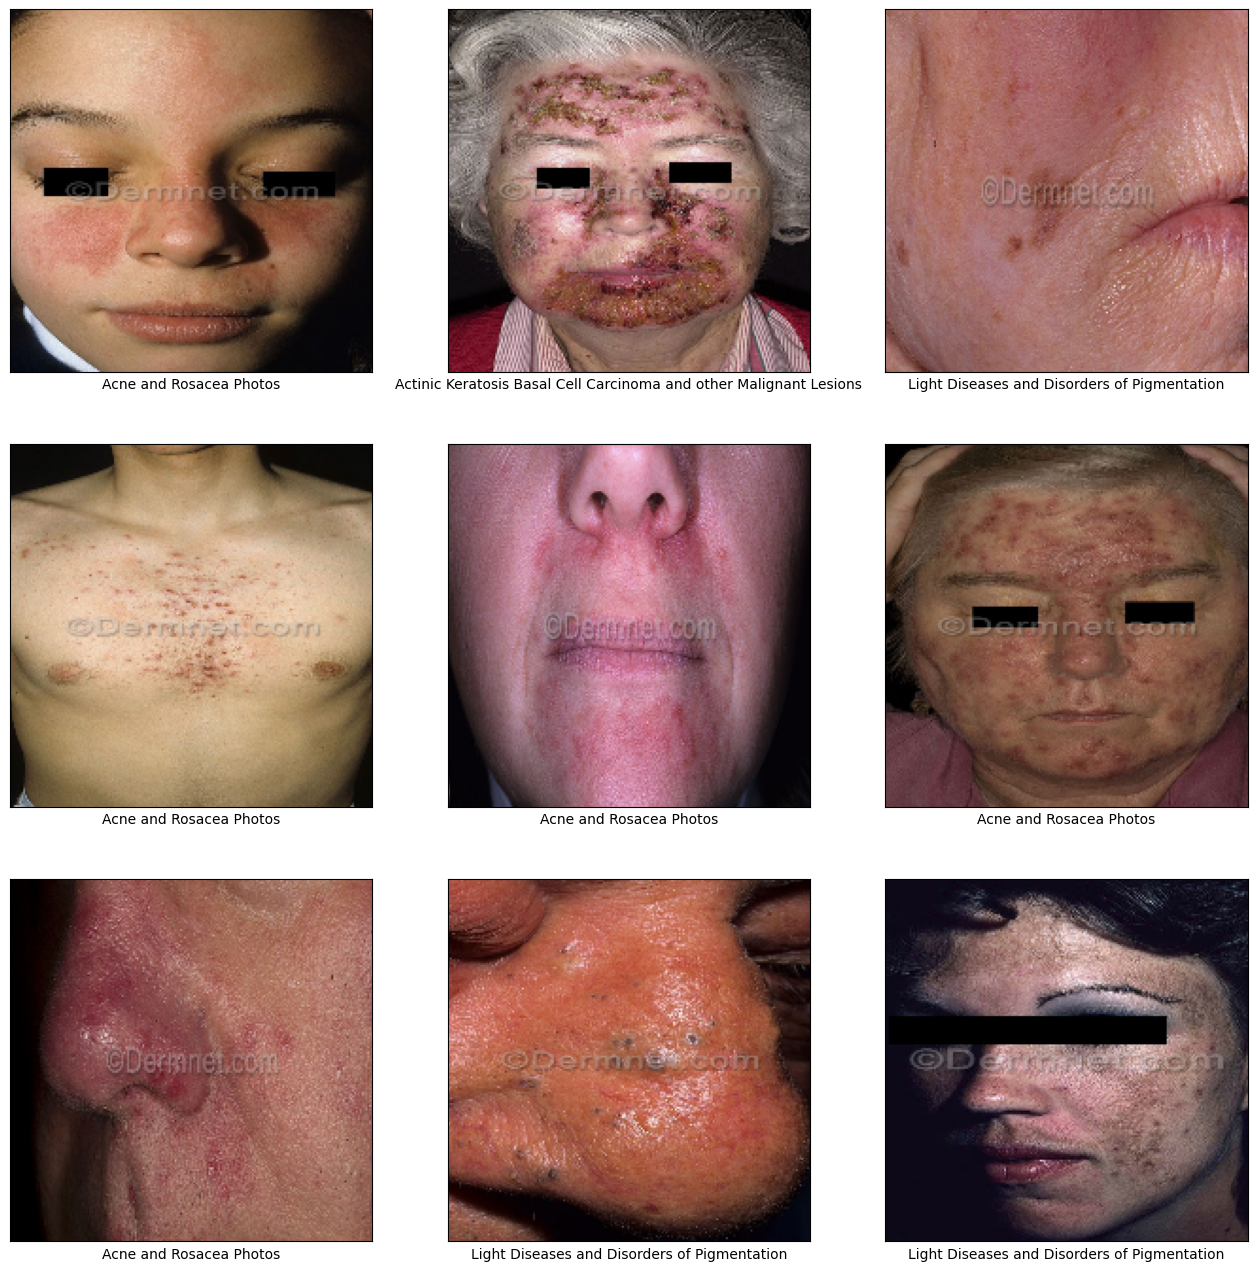

In [8]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/cnn-cheetahs-and-lions-classifier

from random import randint

fig, axs = plt.subplots(3, 3, figsize=(16, 16))#Original was 10,6

for x in range(3):
    for y in range(3):
        i = randint(0, len(images))
        
        axs[x][y].imshow(images[i])
        
                    
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])
        
        
plt.show()

In [9]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.15, random_state=42)

print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')

train images shape: (2217, 192, 192, 3)
train labels shape: (2217, 19)

validation images shape: (392, 192, 192, 3)
validation labels shape: (392, 19)



In [10]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

import tensorflow as tf

cnn_model = tf.keras.Sequential()

# Inputs and rescaling
cnn_model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(img_size)))

# Convolutional block 1
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 2
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 3
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 4
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(tf.keras.layers.Flatten())

# Dense block
cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


cnn_model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()
cnn_model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 192, 192, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 192, 192, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 192, 192, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 96, 96, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 96, 96, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 96, 96, 128)         │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 48, 48, 256)         │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 48, 48, 256)         │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 512)         │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 512)         │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      18,874,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 19)                  │           1,235 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,021,907 (80.19 MB)

 Trainable params: 21,021,907 (80.19 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

from tensorflow.keras.callbacks import ModelCheckpoint

# creating ModelChecpoint callback
checkpoint_callback = ModelCheckpoint('cnn_model/model{epoch:02d}.keras')

In [12]:
history = cnn_model.fit(images, labels, epochs=20, validation_data=(X_val, y_val), callbacks=[checkpoint_callback])

Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 34s 272ms/step - accuracy: 0.3029 - loss: 2.6989 - val_accuracy: 0.3265 - val_loss: 2.3704
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.3274 - loss: 2.3439 - val_accuracy: 0.3265 - val_loss: 2.3134
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.3343 - loss: 2.2809 - val_accuracy: 0.3418 - val_loss: 2.2943
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.3047 - loss: 2.3062 - val_accuracy: 0.3597 - val_loss: 2.2176
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.3376 - loss: 2.2023 - val_accuracy: 0.3469 - val_loss: 2.2319
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.3358 - loss: 2.2084 - val_accuracy: 0.3571 - val_loss: 2.1898
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.3513 - loss: 2.0966 - val_accuracy: 0.3699 - val_loss: 2.0967
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.3808 - loss: 2.0168 - val_accu

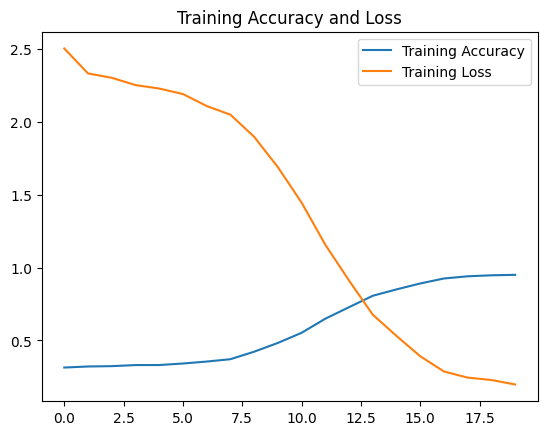

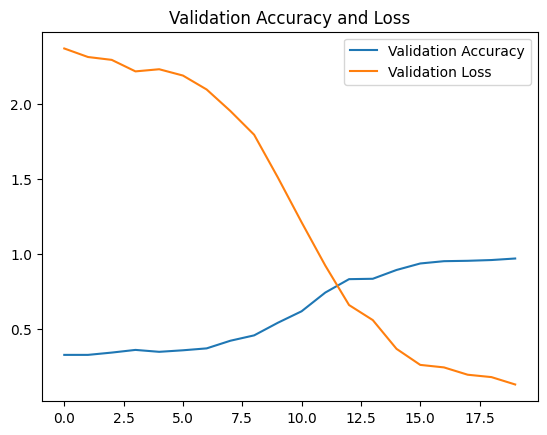

In [13]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss')

plt.figure()
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Validation Accuracy and Loss')

plt.show()

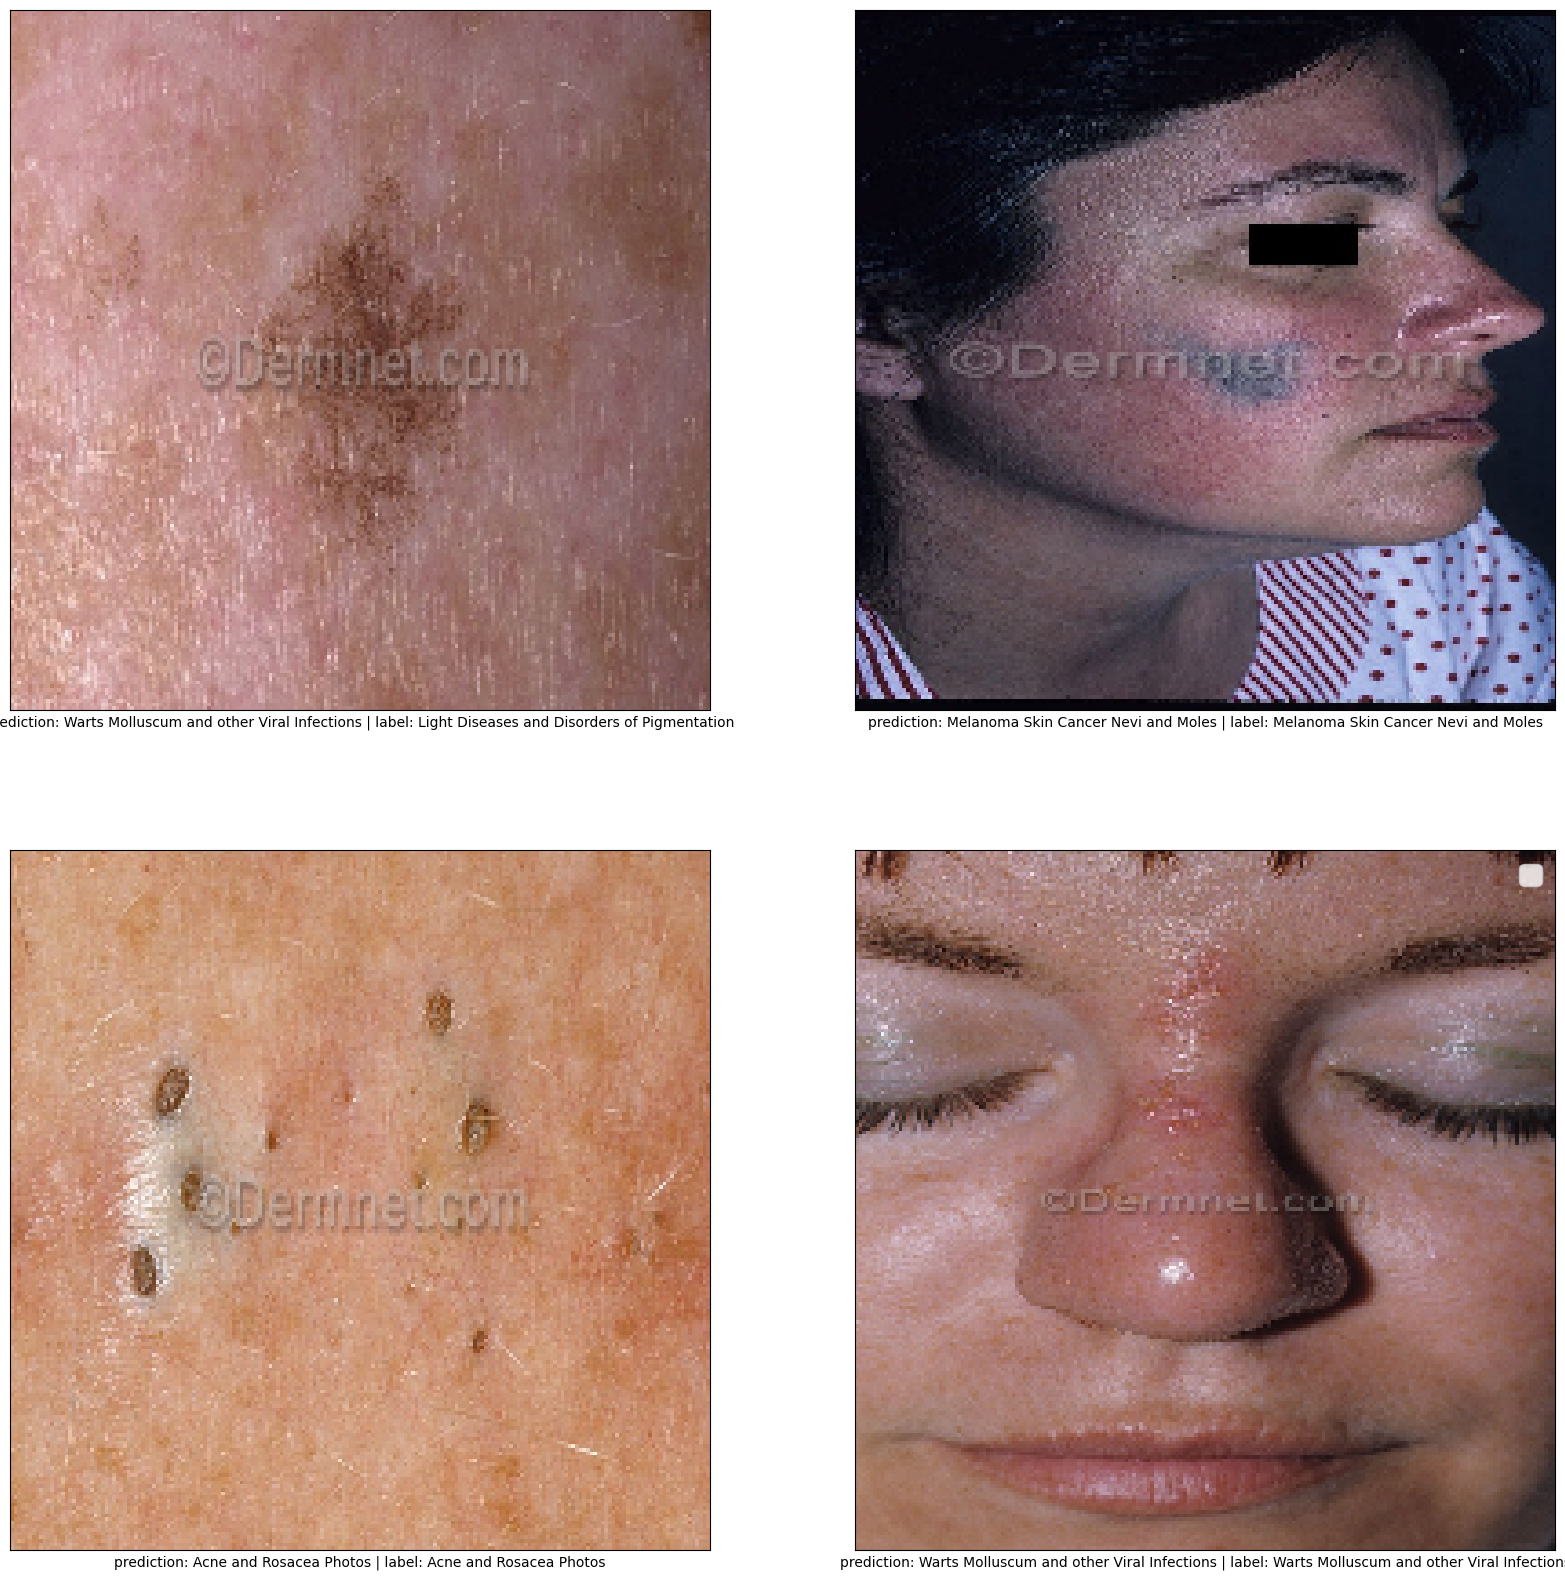

In [14]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

fig, axs = plt.subplots(2, 2, figsize=(20, 20))#Original was 7,4 (28 is higher than 25) and figsize 15,15
plt.legend(fontsize="20")#I can't read any of them

i = 0
for x in range(2): #Original was 7 so resulted in error 7X4 = 28
    for y in range(2):
        prediction = cnn_model.predict(X_val[i][None, ...], verbose=0)[0],
       
        
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(f'prediction: {class_names[np.argmax(prediction)]} | label: {class_names[np.argmax(y_val[i])]}')
        
        axs[x][y].imshow(X_val[i])
        
        i += 1
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


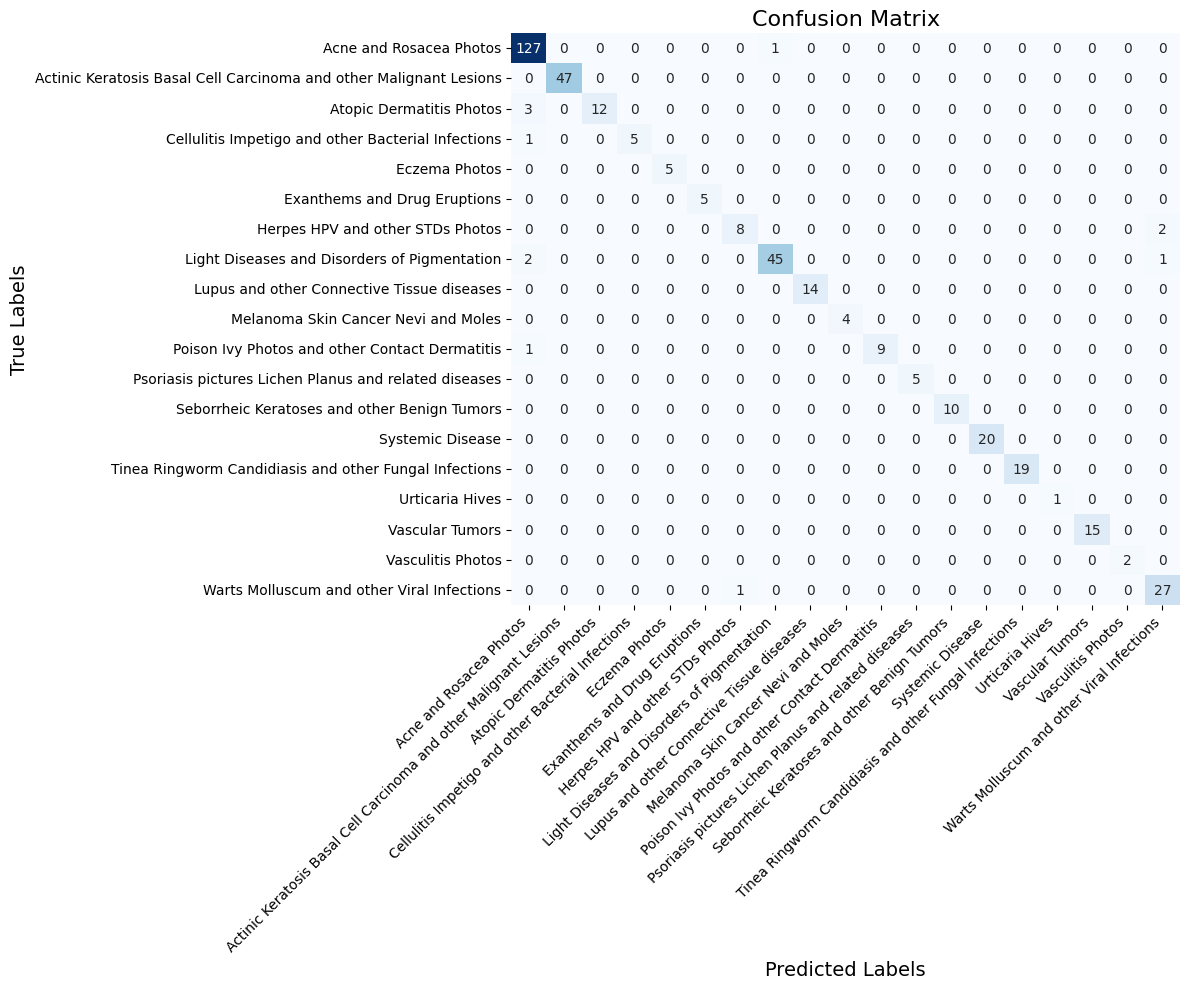

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred = cnn_model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot with Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=class_names, 
            yticklabels=class_names,
            cbar=False)

# Customize plot
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [16]:
import numpy as np
import cv2
import requests
import tensorflow as tf

# Configure requests to avoid blocking
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# 1. Load your trained model
model = tf.keras.models.load_model('my_model.h5')  # Update path

# 2. Class names (must match your model's training)
CLASS_NAMES = [
    'Acne and Rosacea', 'Actinic Keratosis', 'Atopic Dermatitis',
    'Bacterial Infections', 'Eczema', 'Drug Eruptions',
    'Herpes HPV', 'Pigmentation Disorders', 'Lupus',
    'Melanoma', 'Contact Dermatitis', 'Psoriasis',
    'Benign Tumors', 'Systemic Disease', 'Fungal Infections',
    'Hives', 'Vascular Tumors', 'Vasculitis', 'Viral Infections'
]

def predict_skin_disease(image_url=None):
    """Returns (prediction, confidence) or (None, None) if failed."""
    # Guaranteed working test images (choose one):
    TEST_IMAGES = [
        "https://i.imgur.com/6VYggvc.jpg",  # Psoriasis example
        "https://i.imgur.com/7W6kD9a.jpg",  # Eczema example
        "https://i.imgur.com/9pJZf3X.jpg"   # Melanoma example
    ]
    
    try:
        # Use provided URL or fallback to test image
        url = image_url if image_url else TEST_IMAGES[0]
        
        # Download with proper headers
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        
        # Process image
        img = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)
        if img is None:
            raise ValueError("Invalid image format")
            
        # Preprocessing (must match model training)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (192, 192))  # Update if your model uses different size
        img = img / 255.0  # Normalize
        
        # Predict
        pred = model.predict(np.expand_dims(img, 0), verbose=0)[0]
        return CLASS_NAMES[np.argmax(pred)], float(np.max(pred))
        
    except Exception as e:
        print(f"Error: {str(e)}")
        return None, None

# Example usage
prediction, confidence = predict_skin_disease()  # Uses fallback
# prediction, confidence = predict_skin_disease("your_url.jpg")  # Custom image

if prediction:
    print(f"Prediction: {prediction} (Confidence: {confidence:.1%})")
else:
    print("Prediction failed - trying fallback images...")
    # Try other test images
    for test_img in TEST_IMAGES[1:]:
        prediction, confidence = predict_skin_disease(test_img)
        if prediction:
            print(f"Fallback prediction: {prediction}")
            break

Prediction: Actinic Keratosis (Confidence: 5.3%)
